In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional
from torch import nn
print(torch.__version__)

2.9.0+cu126


In [2]:
!nvidia-smi

Tue Nov 25 02:51:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Linear Regression Mocking Problem Using Pytorch

In [3]:
weights = 0.7
bias = 0.3

start = 0
end = 1.5
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weights + bias

In [4]:
def plot_predictions(
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_test: torch.Tensor,
    y_test: torch.Tensor,
    predictions: Optional[torch.Tensor] = None
):
  """
  An function that visualize the 2d dataset in simple
  linear regression using pytorch
  """
  plt.figure(figsize=(8,6))
  plt.scatter(X_train, y_train, c="b", marker="o", label="Training Data")
  plt.scatter(X_test, y_test, c="g", marker="o", label="Test Data")

  if predictions != None:
    plt.scatter(X_test, predictions, c="r", marker="x", label="Prediction Data")

  plt.title("2D Visualize Dataset")
  plt.tight_layout()
  plt.xlabel("X dataset")
  plt.ylabel("Target")
  plt.legend(prop={"size": 14})
  plt.show()

## Dataset Splitting
For example:
80:20 Train Test
Using simple train test split


In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

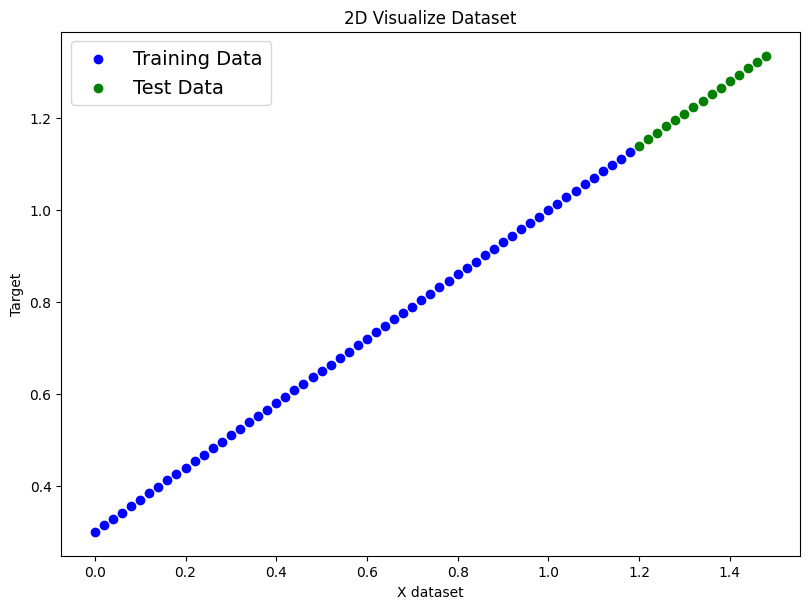

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
y_train, X_train

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460],
         [0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860],
         [1.0000],
         [1.0140],
         [1.

## Simple Linear Regresssion making on pytorch

In [8]:
class MyLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                               dtype=torch.float,
                               requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,
                            dtype=torch.float,
                            requires_grad=True))

  def forward(self, X: torch.Tensor):
    return self.weights * X + self.bias

In [9]:
torch.manual_seed(42)

my_model_0 = MyLinearRegression()

list(my_model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
with torch.inference_mode():
  untrain_pred = my_model_0(X_test)

In [11]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(untrain_pred)}")
print(f"Predicted values:\n{untrain_pred}")

Number of testing samples: 15
Number of predictions made: 15
Predicted values:
tensor([[0.5328],
        [0.5396],
        [0.5463],
        [0.5530],
        [0.5598],
        [0.5665],
        [0.5732],
        [0.5800],
        [0.5867],
        [0.5934],
        [0.6002],
        [0.6069],
        [0.6136],
        [0.6204],
        [0.6271]])


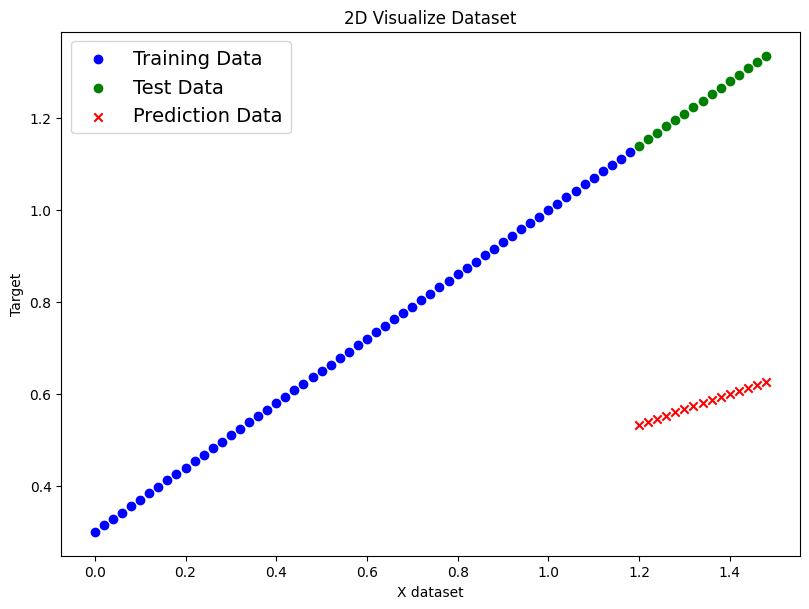

In [12]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=untrain_pred)

In [13]:
y_test - untrain_pred

tensor([[0.6072],
        [0.6144],
        [0.6217],
        [0.6290],
        [0.6362],
        [0.6435],
        [0.6508],
        [0.6580],
        [0.6653],
        [0.6726],
        [0.6798],
        [0.6871],
        [0.6944],
        [0.7016],
        [0.7089]])

## Initiate the Loss Function and the Optimizer for gradient descent

Loss function for seeing how much far away the prediction and the actual target <br>
Optimizer will give the parameter a direction to increase or decrease so the parameter will be come closer to the actual target.

In [14]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(my_model_0.parameters(),
                            lr= 0.01)

## Train the model
1. Feed using train data (Forward Propagate) or Forward pass
2. Compute Loss
3. Zero Grad
4. Backpropagation or backward trough the network
5. Optimize Parameter

In [15]:
epochs = 150

# Metric collection
losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
  # Enable the grads in parameter
  my_model_0.train()

  # Feed Forward
  y_pred = my_model_0(X_train)

  # Compute Loss
  loss = loss_fn(y_pred, y_train)

  # Zero Grad or clear the gradient before
  optimizer.zero_grad()

  # Compute Backpropagation from loss
  loss.backward()

  # Update the parameter based on the gradient descent that compute on the backpropagation
  optimizer.step()

  my_model_0.eval()
  with torch.inference_mode():
    test_pred = my_model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    losses.append(loss)
    test_losses.append(test_loss)
    print(my_model_0.state_dict())
    print(f"epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ")


OrderedDict({'weights': tensor([0.3426]), 'bias': tensor([0.1388])})
epoch: 0 | Loss: 0.38554325699806213 | Test Loss: 0.6401195526123047 
OrderedDict({'weights': tensor([0.4016]), 'bias': tensor([0.2388])})
epoch: 10 | Loss: 0.25073325634002686 | Test Loss: 0.4610595405101776 
OrderedDict({'weights': tensor([0.4604]), 'bias': tensor([0.3348])})
epoch: 20 | Loss: 0.12085915356874466 | Test Loss: 0.28619614243507385 
OrderedDict({'weights': tensor([0.5117]), 'bias': tensor([0.3845])})
epoch: 30 | Loss: 0.062185242772102356 | Test Loss: 0.16784998774528503 
OrderedDict({'weights': tensor([0.5467]), 'bias': tensor([0.3938])})
epoch: 40 | Loss: 0.04683758690953255 | Test Loss: 0.11157193034887314 
OrderedDict({'weights': tensor([0.5714]), 'bias': tensor([0.3851])})
epoch: 50 | Loss: 0.039780694991350174 | Test Loss: 0.08722086250782013 
OrderedDict({'weights': tensor([0.5930]), 'bias': tensor([0.3718])})
epoch: 60 | Loss: 0.033337295055389404 | Test Loss: 0.07160995900630951 
OrderedDict({

/tmp/ipython-input-2710649430.py:1: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  plt.plot(epoch_count, np.array(torch.tensor(losses).cpu().numpy()), c="b", label="train loss")


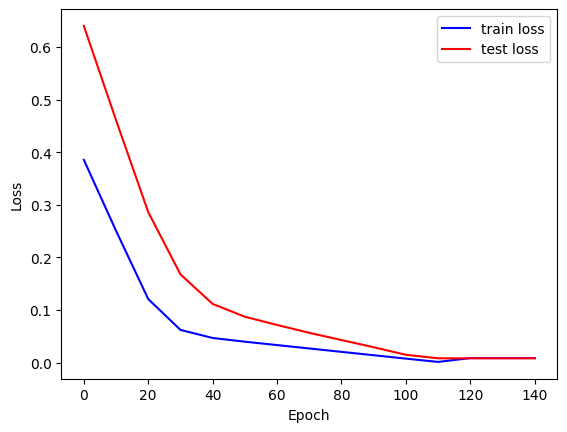

In [16]:
plt.plot(epoch_count, np.array(torch.tensor(losses).cpu().numpy()), c="b", label="train loss")
plt.plot(epoch_count, test_losses, c="r", label="test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
with torch.inference_mode():
  trained_test = my_model_0(X_test)

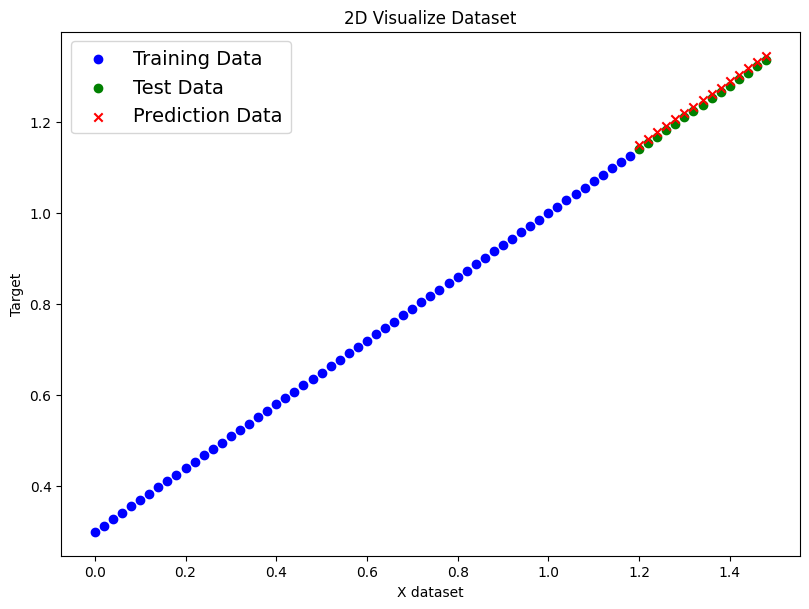

In [18]:
plot_predictions(X_train, y_train, X_test, y_test, trained_test)

## Save Load Model Using State Dict not all the class and parameter

In [19]:
# Save
from pathlib import Path

MODEL_FOLDER = Path("models")
MODEL_FOLDER.mkdir(parents=True, exist_ok=True)
MODEL_PATH = MODEL_FOLDER / "LinearRegressionV1.pth"

torch.save(my_model_0.state_dict(), MODEL_PATH)

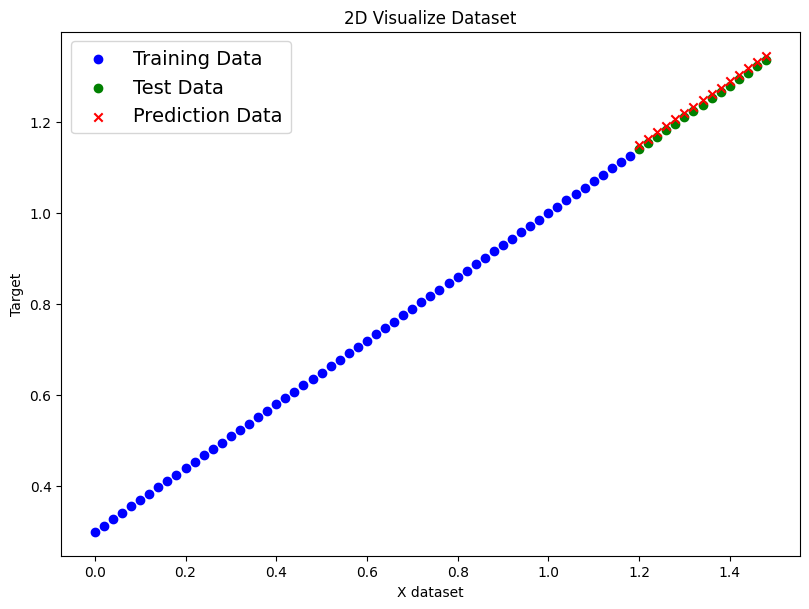

In [20]:
# Load using new var
loaded_model = MyLinearRegression()

# Load Weight from saved path
loaded_model.load_state_dict(torch.load(MODEL_PATH))

with torch.inference_mode():
  loaded_pred = loaded_model(X_test)

plot_predictions(X_train, y_train, X_test, y_test, loaded_pred)

## Create Custom Regression using submodule in neural network instead of from scratch

In [110]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [111]:
next(model_1.parameters()).device

device(type='cpu')

In [112]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [113]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [114]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [115]:
loss_fn2 = nn.L1Loss()
optimizer2 = torch.optim.SGD(model_1.parameters(),
                             lr=0.01)

In [116]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn2(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer2.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer2.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn2(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5680856704711914 | Test loss: 0.5985835790634155
Epoch: 100 | Train loss: 0.015214123763144016 | Test loss: 0.03129298985004425
Epoch: 200 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 300 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 400 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 500 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 600 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 700 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 800 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381
Epoch: 900 | Train loss: 0.008908089250326157 | Test loss: 0.004866600502282381


In [117]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.1277],
        [1.1416],
        [1.1555],
        [1.1694],
        [1.1833],
        [1.1972],
        [1.2111],
        [1.2250],
        [1.2389],
        [1.2527],
        [1.2666],
        [1.2805],
        [1.2944],
        [1.3083],
        [1.3222]], device='cuda:0')

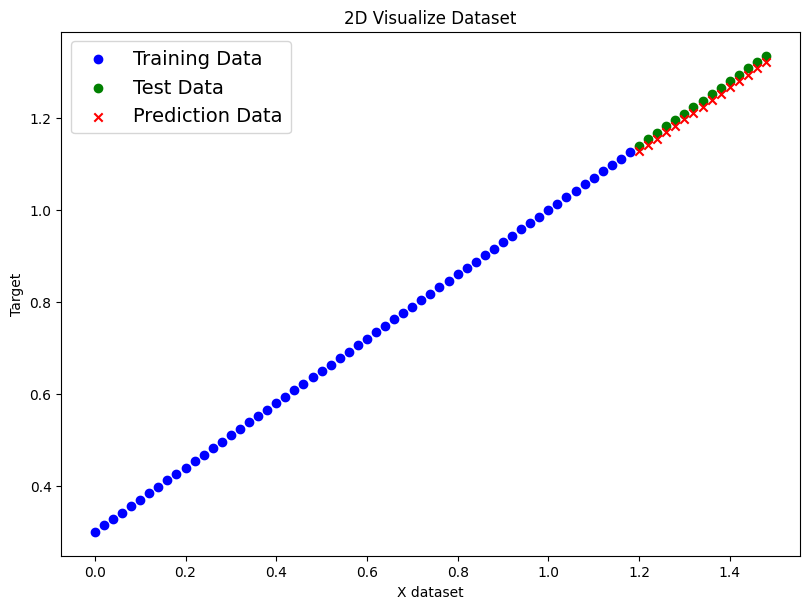

In [118]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions=y_preds.cpu())

In [120]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weights}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6945]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2943], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
